In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import drive

## Loading data

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
directory = '/content/drive/MyDrive/monkeypox_images'

In [24]:
IMG_SIZE = (160,160)
BATCH_SIZE = 32

In [25]:

train_dataset = image_dataset_from_directory(directory=directory,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='training')

test_dataset = image_dataset_from_directory(directory=directory,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=42,validation_split=0.2,subset='validation')

Found 770 files belonging to 4 classes.
Using 616 files for training.
Found 770 files belonging to 4 classes.
Using 154 files for validation.


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Showing the data

In [27]:
class_names = train_dataset.class_names

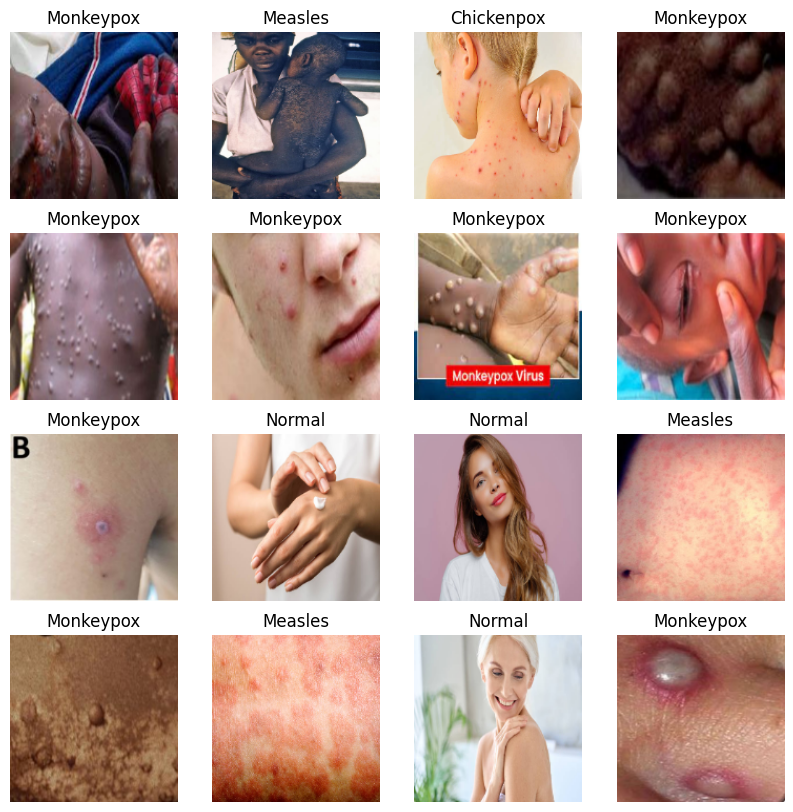

In [28]:
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

## Data augmentation

In [29]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.4),
])

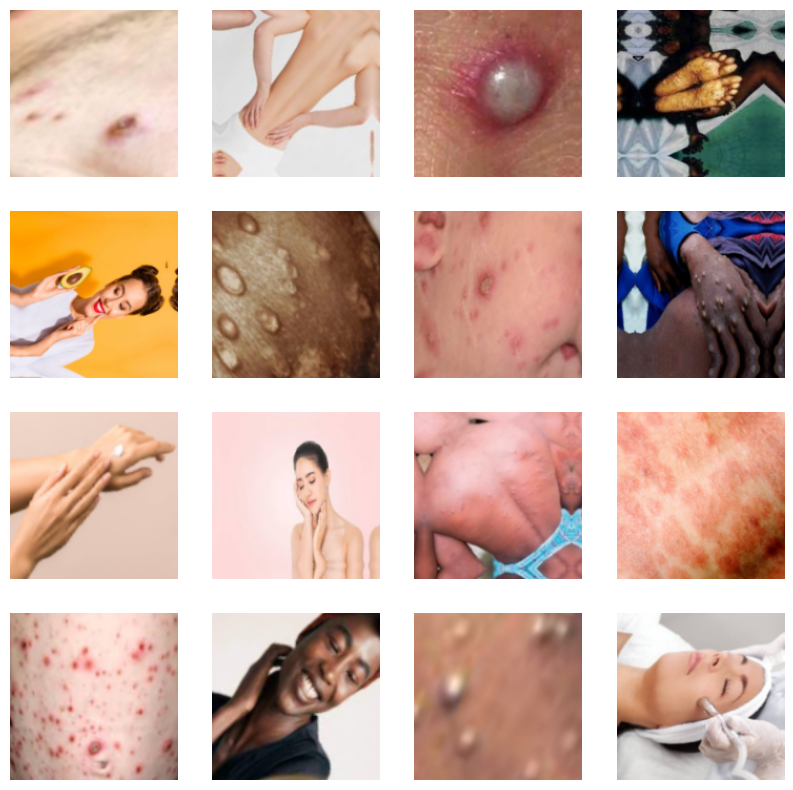

In [30]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  for i in range(16):
    img_augmented  = data_augmentation(images)
    ax = plt.subplot(4,4,i+1)
    plt.imshow(img_augmented[i].numpy().astype('uint8'))
    plt.axis("off")
plt.show()

## Improving performance applying autotune

In [31]:
AUTOTUNE  = tf.data.AUTOTUNE

train_dataset= train_dataset.prefetch(buffer_size=AUTOTUNE)

test_datase= test_dataset.prefetch(buffer_size=AUTOTUNE)

## Model CNN

In [32]:
num_classes = 4

In [33]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.experimental.preprocessing.Rescaling(1./255),

    Conv2D(64,3,strides=2,padding='same',activation='relu',input_shape=(160,160,3)),
    MaxPooling2D(),

    Conv2D(64,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),

    Conv2D(32,3,strides=2,padding='same',activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(100,activation='relu'),

    Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [35]:
model.fit(train_dataset,validation_data=test_dataset,epochs=300)

Epoch 1/300
20/20 [==============================] - 5s 90ms/step - loss: 1.2846 - accuracy: 0.3847 - val_loss: 1.2801 - val_accuracy: 0.3831
Epoch 2/300
20/20 [==============================] - 3s 90ms/step - loss: 1.2492 - accuracy: 0.4075 - val_loss: 1.2517 - val_accuracy: 0.3831
Epoch 3/300
20/20 [==============================] - 4s 169ms/step - loss: 1.2255 - accuracy: 0.4903 - val_loss: 1.1689 - val_accuracy: 0.5130
Epoch 4/300
20/20 [==============================] - 3s 89ms/step - loss: 1.1491 - accuracy: 0.5260 - val_loss: 1.1761 - val_accuracy: 0.5584
Epoch 5/300
20/20 [==============================] - 3s 95ms/step - loss: 1.1166 - accuracy: 0.5422 - val_loss: 1.1283 - val_accuracy: 0.5584
Epoch 6/300
20/20 [==============================] - 3s 128ms/step - loss: 1.1220 - accuracy: 0.5487 - val_loss: 1.1265 - val_accuracy: 0.5455
Epoch 7/300
20/20 [==============================] - 3s 104ms/step - loss: 1.0613 - accuracy: 0.5779 - val_loss: 1.0941 - val_accuracy: 0.5584
Epo

## Model evaluation

In [36]:
model.evaluate(test_dataset)

5/5 [==============================] - 0s 9ms/step - loss: 1.3102 - accuracy: 0.6753


[1.3101997375488281, 0.6753246784210205]

In [37]:
predicciones = model.predict(test_dataset)

5/5 [==============================] - 1s 8ms/step


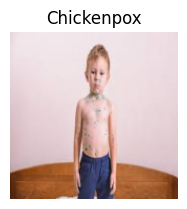

1/1 [==============================] - 0s 71ms/step
Esta imagen es más probable a peternecer a Normal with a 96.89 porcentaje de confianza


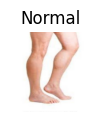

1/1 [==============================] - 0s 21ms/step
Esta imagen es más probable a peternecer a Normal with a 99.12 porcentaje de confianza


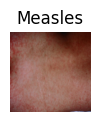

1/1 [==============================] - 0s 22ms/step
Esta imagen es más probable a peternecer a Measles with a 94.06 porcentaje de confianza


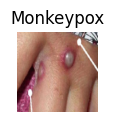

1/1 [==============================] - 0s 22ms/step
Esta imagen es más probable a peternecer a Monkeypox with a 99.38 porcentaje de confianza


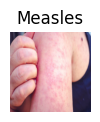

1/1 [==============================] - 0s 25ms/step
Esta imagen es más probable a peternecer a Measles with a 76.67 porcentaje de confianza


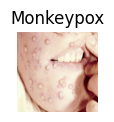

1/1 [==============================] - 0s 18ms/step
Esta imagen es más probable a peternecer a Chickenpox with a 61.63 porcentaje de confianza


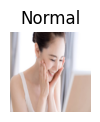

1/1 [==============================] - 0s 20ms/step
Esta imagen es más probable a peternecer a Normal with a 99.31 porcentaje de confianza


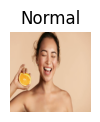

1/1 [==============================] - 0s 18ms/step
Esta imagen es más probable a peternecer a Normal with a 99.06 porcentaje de confianza


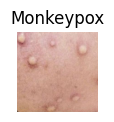

1/1 [==============================] - 0s 16ms/step
Esta imagen es más probable a peternecer a Chickenpox with a 49.10 porcentaje de confianza


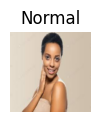

1/1 [==============================] - 0s 24ms/step
Esta imagen es más probable a peternecer a Normal with a 100.00 porcentaje de confianza


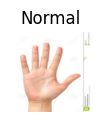

1/1 [==============================] - 0s 27ms/step
Esta imagen es más probable a peternecer a Normal with a 99.68 porcentaje de confianza


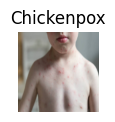

1/1 [==============================] - 0s 22ms/step
Esta imagen es más probable a peternecer a Chickenpox with a 92.90 porcentaje de confianza


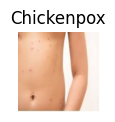

1/1 [==============================] - 0s 19ms/step
Esta imagen es más probable a peternecer a Normal with a 62.36 porcentaje de confianza


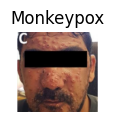

1/1 [==============================] - 0s 23ms/step
Esta imagen es más probable a peternecer a Monkeypox with a 99.85 porcentaje de confianza


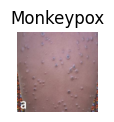

1/1 [==============================] - 0s 29ms/step
Esta imagen es más probable a peternecer a Monkeypox with a 84.82 porcentaje de confianza


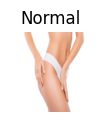

1/1 [==============================] - 0s 31ms/step
Esta imagen es más probable a peternecer a Normal with a 98.24 porcentaje de confianza


In [38]:
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.show()

    img_array  = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "Esta imagen es más probable a peternecer a {} with a {:.2f} porcentaje de confianza".format(class_names[tf.argmax(score)],100*tf.reduce_max(score)))